In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [9]:
cancer = datasets.load_breast_cancer()
print(f"target_names: {cancer.target_names}")
print(f"feature_names: {cancer.feature_names}")
featrues = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target = pd.DataFrame(cancer.target, columns=['target'])
# print(len(target))
cancer_data = pd.concat([featrues,target], axis=1)
# display(cancer_data.corr()['target'].sort_values())
cancer_data = cancer_data[['worst concave points','worst perimeter','target']]
cancer_data.head()

target_names: ['malignant' 'benign']
feature_names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,worst concave points,worst perimeter,target
0,0.2654,184.60,0
1,0.1860,158.80,0
2,0.2430,152.50,0
3,0.2575,98.87,0
4,0.1625,152.20,0


In [4]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = cancer_data.loc[:,['worst concave points','worst perimeter']].values
y = cancer_data.loc[:,['target']].values.flatten()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

pla = Perceptron().fit(x_train, y_train)
y_pred = pla.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9824561403508771


In [5]:
print(f'coef : {pla.coef_}, intercept : {pla.intercept_}')

coef : [[-0.22711162 -1.15483941]], intercept : [0.]


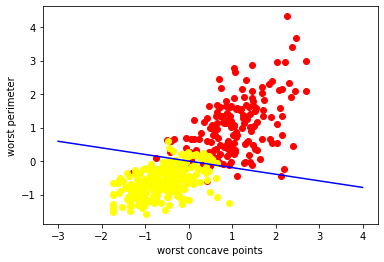

In [6]:
import matplotlib.pyplot as plt

x_decision_boundary = np.linspace(-3,4)
y_decision_boundary = (-pla.coef_[0,0]/pla.coef_[0,1])*x_decision_boundary - pla.intercept_
plt.plot(x_decision_boundary, y_decision_boundary,c='blue')
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],c='red')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],c='yellow')
plt.xlabel('worst concave points')
plt.ylabel('worst perimeter')
plt.show()

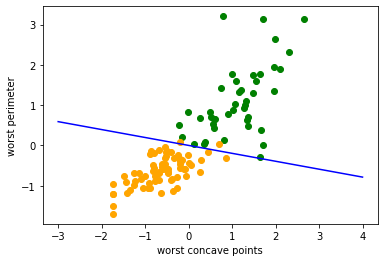

In [7]:
x_decision_boundary = np.linspace(-3,4)
y_decision_boundary = (-pla.coef_[0,0]/pla.coef_[0,1])*x_decision_boundary + pla.intercept_
plt.plot(x_decision_boundary, y_decision_boundary,c='blue')
plt.scatter(x_test[y_test==0,0],x_test[y_test==0,1],c='green')
plt.scatter(x_test[y_test==1,0],x_test[y_test==1,1],c='orange')
plt.xlabel('worst concave points')
plt.ylabel('worst perimeter')
plt.show()